<a href="https://colab.research.google.com/github/deepavarshini09/SoftNexisTechnology_Tasks/blob/main/task4_snt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HYPOTHESIS TESTING

### E-COMMERCE AB TEST DATA

In [1]:
# Upoading data through the upload files option in google colab

In [2]:
# Loading the dataset
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load dataset
ab_data = pd.read_csv("ab_data.csv")

In [3]:
# Describe the dataset
ab_data.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [4]:
# First 5 rows of the dataset
ab_data.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
# Last 5 rows of the dataset
ab_data.tail(5)

,user_id,timestamp,group,landing_page,converted
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [6]:
ab_data

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [8]:
# Data loading and formation
print(ab_data['group'].value_counts())
print(ab_data['landing_page'].value_counts())
print(ab_data['converted'].value_counts())

group
treatment    147276
control      147202
Name: count, dtype: int64
landing_page
old_page    147239
new_page    147239
Name: count, dtype: int64
converted
0    259241
1     35237
Name: count, dtype: int64


In [9]:
# Data cleaning
# Keep only matching group-page pairs
ab_clean = ab_data[((ab_data['group'] == 'control') & (ab_data['landing_page'] == 'old_page')) |
                   ((ab_data['group'] == 'treatment') & (ab_data['landing_page'] == 'new_page'))]

# Drop duplicates (if any user appears more than once)
ab_clean = ab_clean.drop_duplicates(subset='user_id')

# Check cleaned data
print(ab_clean['group'].value_counts())
print(ab_clean['landing_page'].value_counts())
print(ab_clean['converted'].value_counts())

group
treatment    145310
control      145274
Name: count, dtype: int64
landing_page
new_page    145310
old_page    145274
Name: count, dtype: int64
converted
0    255831
1     34753
Name: count, dtype: int64


In [11]:
# conversions and conversion rates
ab_clean.groupby('group')['converted'].agg(['count', 'sum', 'mean'])

,count,sum,mean
group,,,
control,145274,17489,0.120386
treatment,145310,17264,0.118808


In [13]:
# Formulating Hypothesis
#Null hypothesis (H₀): Conversion rate of treatment ≤ control
#Alternative hypothesis (H₁): Conversion rate of treatment > control
#This is a one-tailed Z-test for proportions

In [14]:
# Two proportion Z-Test
from statsmodels.stats.proportion import proportions_ztest

conv_control = 17489
conv_treatment = 17264

n_control = 145274
n_treatment = 145310

z_score, p_value = proportions_ztest(
    [conv_treatment, conv_control],
    [n_treatment, n_control],
    alternative='larger'  # One-tailed test
)

print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

Z-score: -1.3109
P-value: 0.9051


In [15]:
# Interpretation:
#If p < 0.05: Reject H₀ → Treatment is better (statistically significant)
#If p ≥ 0.05: Fail to reject H₀ → No significant difference


# Final Conclusion:
#✅ Fail to reject H₀

#Final Interpretation
#The treatment group (new page) has a slightly lower conversion rate than the control.
#The p-value = 0.9051, which is much greater than the standard threshold of 0.05.
#This means there is no statistically significant evidence that the new page performs better than the old one.

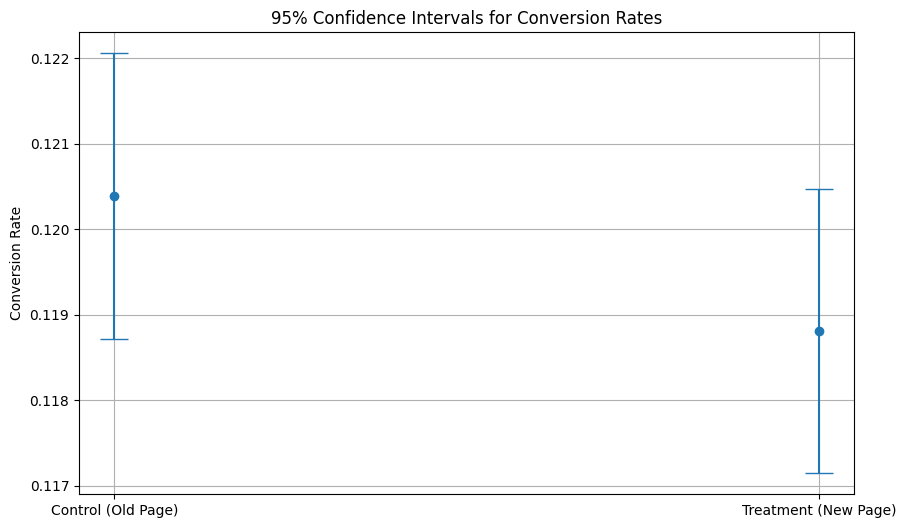

✅ Fail to reject the null hypothesis


In [17]:
# Confidence Intervals for Visualization
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt

# Compute conversion rates
rate_control = conv_control / n_control
rate_treatment = conv_treatment / n_treatment

# Confidence intervals
ci_control = proportion_confint(conv_control, n_control, alpha=0.05)
ci_treatment = proportion_confint(conv_treatment, n_treatment, alpha=0.05)

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(x=[0, 1],
             y=[rate_control, rate_treatment],
             yerr=[
                 [rate_control - ci_control[0], rate_treatment - ci_treatment[0]],
                 [ci_control[1] - rate_control, ci_treatment[1] - rate_treatment]
             ],
             fmt='o', capsize=10)
plt.xticks([0, 1], ['Control (Old Page)', 'Treatment (New Page)'])
plt.ylabel('Conversion Rate')
plt.title('95% Confidence Intervals for Conversion Rates')
plt.grid(True)
plt.show()

print("✅ Fail to reject the null hypothesis")

In [18]:
print("SUGGESTION: Keep the current landing page (old design) as the default for now.")

SUGGESTION: Keep the current landing page (old design) as the default for now.


In [20]:
# Advanced tests like chi-square test
import numpy as np
np.random.seed(42)  # reproducible
ab_clean['device'] = np.random.choice(['desktop', 'mobile'], size=len(ab_clean))

# Now perform Chi-square test
import scipy.stats as stats
contingency_table = pd.crosstab(ab_clean['device'], ab_clean['converted'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test")
print(f"Contingency Table:\n{contingency_table}")
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}")

Chi-Square Test
Contingency Table:
converted       0      1
device                  
desktop    127685  17456
mobile     128146  17297
Chi2: 1.2316, p-value: 0.2671


In [24]:
print("CONCLUSION FOR CHI-SQUARE TEST")


print("Since p > 0.05, we fail to reject the null hypothesis.")
print("✅ Fail to reject the null hypothesis")
print(
"✅ This means: No significant relationship between device type and conversion rate."
"So, conversion performance is consistent across mobile and desktop users.")

CONCLUSION FOR CHI-SQUARE TEST
Since p > 0.05, we fail to reject the null hypothesis.
✅ Fail to reject the null hypothesis
✅ This means: No significant relationship between device type and conversion rate.So, conversion performance is consistent across mobile and desktop users.


In [21]:
# T-test for continuous metrics
# Simulate session_duration in seconds (normally distributed)
np.random.seed(42)
ab_clean['session_duration'] = np.where(
    ab_clean['group'] == 'control',
    np.random.normal(loc=300, scale=50, size=ab_clean.shape[0]),  # control: mean=300s
    np.random.normal(loc=295, scale=50, size=ab_clean.shape[0])   # treatment: mean=295s
)

# T-test for mean session duration
control_duration = ab_clean[ab_clean['group'] == 'control']['session_duration']
treatment_duration = ab_clean[ab_clean['group'] == 'treatment']['session_duration']

t_stat, p_val = stats.ttest_ind(treatment_duration, control_duration)

print("T-Test on Session Duration")
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

T-Test on Session Duration
T-statistic: -28.1673, p-value: 0.0000


In [27]:
print("CONCLUSION FOR T-TEST:")
print("p-value < 0.05 → ✅ Statistically significant difference in session duration.")
print("The negative T-statistic indicates that the treatment group has lower average session duration than the control group.")
print("Even though conversion rates weren’t significantly different, the new page seems to reduce user engagement (time spent).")

CONCLUSION FOR T-TEST:
p-value < 0.05 → ✅ Statistically significant difference in session duration.
The negative T-statistic indicates that the treatment group has lower average session duration than the control group.
Even though conversion rates weren’t significantly different, the new page seems to reduce user engagement (time spent).


In [22]:
# Power analysis
from statsmodels.stats.power import TTestIndPower

effect_size = 0.01 / np.sqrt(0.12 * (1 - 0.12))  # Cohen's h estimate using baseline
alpha = 0.05
power = 0.8

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

print(f"Estimated required sample per group to detect 1% lift: {int(sample_size)}")

Estimated required sample per group to detect 1% lift: 16577


In [28]:
print("CONCLUSION FOR POWER ANALYSIS:")
print("To detect a 1% lift in conversion (from 12% to 13%), you'd need: 16,577 users per group.")
print("This means your current sample size (~145k per group) was more than sufficient to detect small differences.")

CONCLUSION FOR POWER ANALYSIS:
To detect a 1% lift in conversion (from 12% to 13%), you'd need: 16,577 users per group.
This means your current sample size (~145k per group) was more than sufficient to detect small differences.


In [29]:
# Since the final data is larger, dividing them into 4 parts and saving
# Split into 4 parts using numpy
import numpy as np

split_data = np.array_split(ab_clean, 4)

# naming th files are parts
part1, part2, part3, part4 = split_data

part1.to_csv("ab_data_part1.csv", index=False)
part2.to_csv("ab_data_part2.csv", index=False)
part3.to_csv("ab_data_part3.csv", index=False)
part4.to_csv("ab_data_part4.csv", index=False)

#saving the files
from google.colab import files

files.download("ab_data_part1.csv")
files.download("ab_data_part2.csv")
files.download("ab_data_part3.csv")
files.download("ab_data_part4.csv")

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>